<a href="https://colab.research.google.com/github/TaeMD/ML-projects/blob/main/Data_Science_on_Autopilot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/insurance.csv')

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
!pip install -U ipykernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [8]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccedf14890>,
      dtype=object)

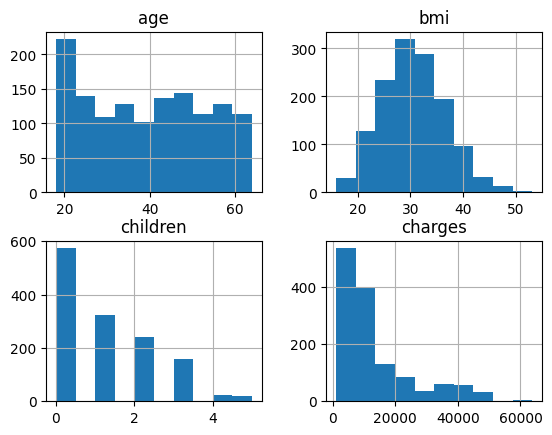

In [13]:
df.hist()

In [14]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
df_region = df.groupby('region').mean()
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


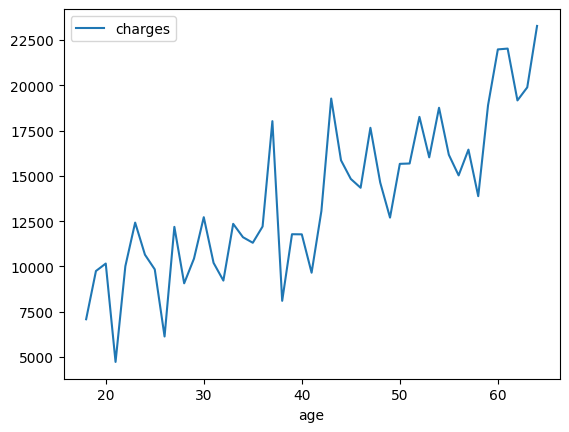

In [26]:
df_age = df.groupby('age').mean()
df_age[['charges']].plot()

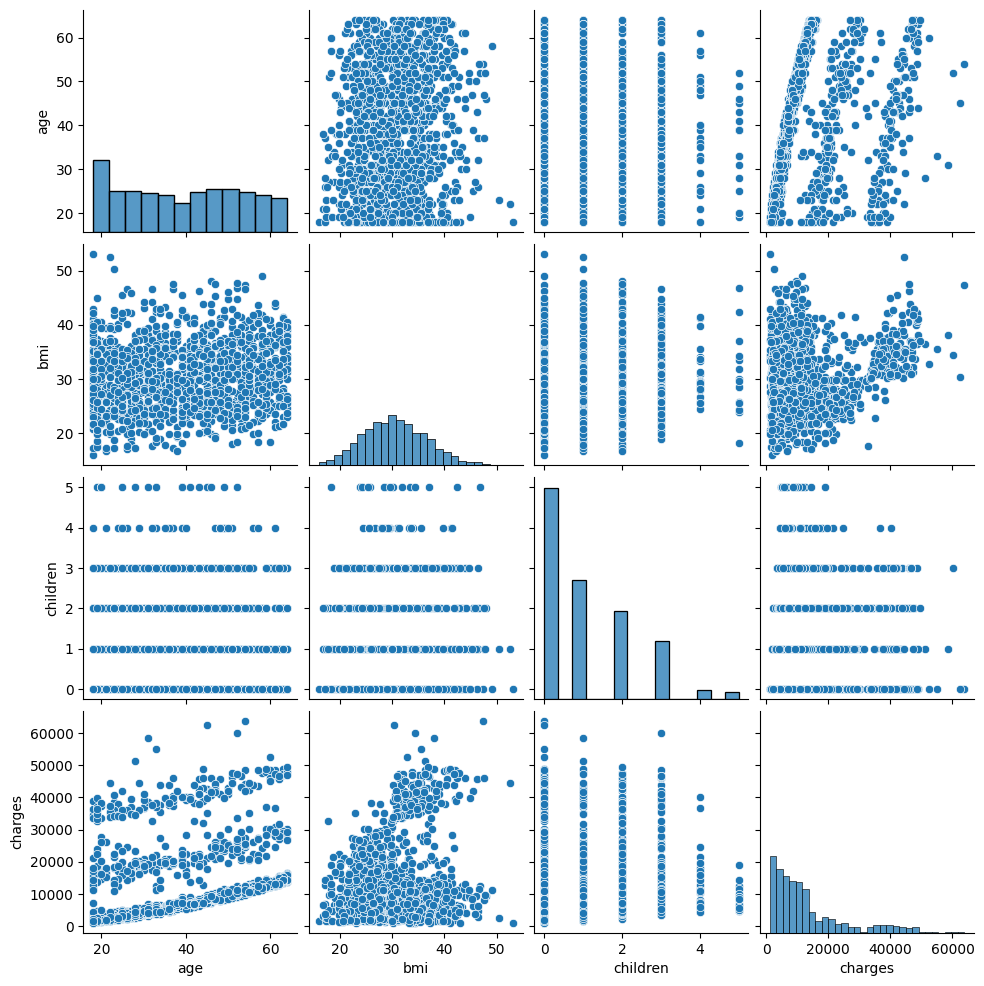

In [27]:
sns.pairplot(df)

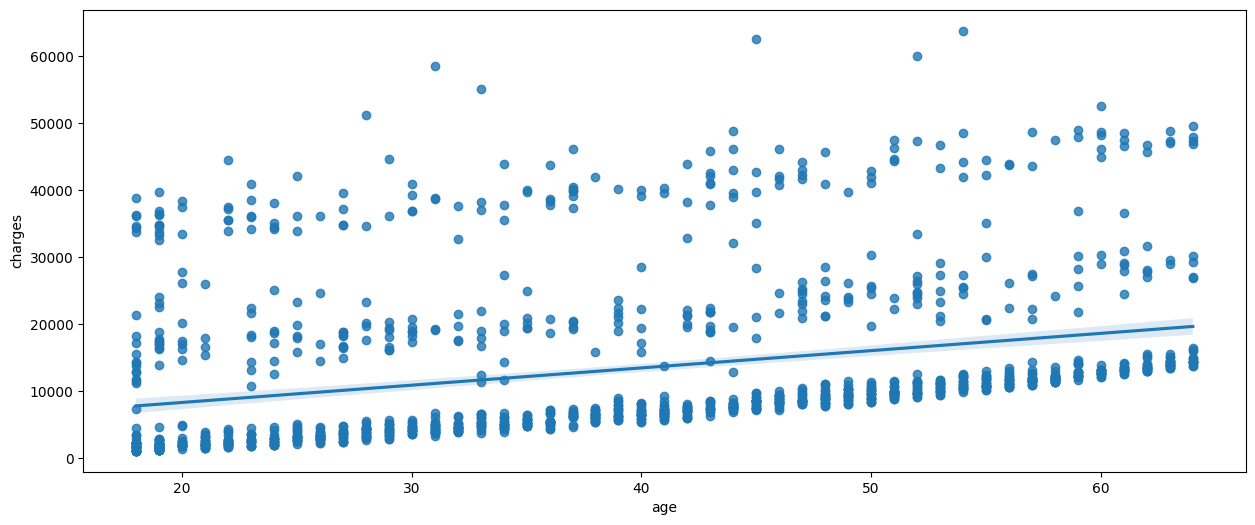

In [30]:
plt.figure(figsize=(15,6))
sns.regplot(x='age', y='charges', data=df)
plt.show()

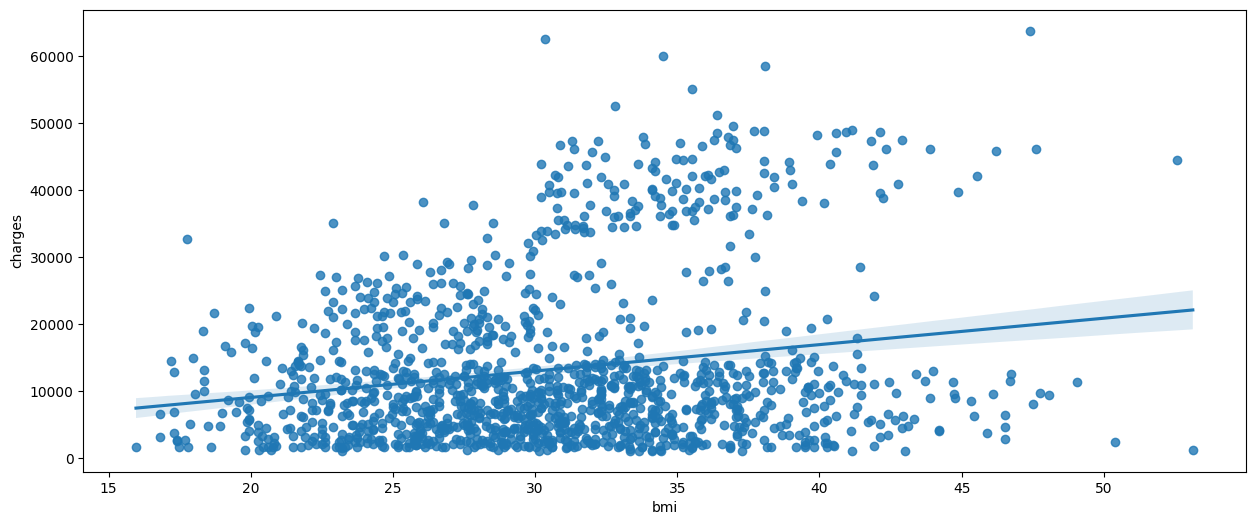

In [31]:
plt.figure(figsize=(15,6))
sns.regplot(x='bmi', y='charges', data=df)
plt.show()

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [36]:
X = df.drop('charges', axis=1)
y = df['charges']

In [37]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
predictor = TabularPredictor(label='charges', problem_type='regression', eval_metric='r2').fit(train_data = X_train,
                                                                                               time_limit=200, presets='best_quality')

In [ ]:
predictor.fit_summary()

In [ ]:
predictor.leaderboard()

In [ ]:
f, ax = plt.subplots(figsize= (15,6))
sns.barplot(x='model', y='score_val', data=predictor.leaderboard(), color='b')
ax.set(ylabel='R2', xlabel='Regression Models')
plt.xticks(rotation =45);

In [ ]:
predictor.evaluate(X_test)

In [49]:
y_pred = predictor.predict(X_test)
print('predictions: ', list(y_pred)[:5])

predictions:  [11437.58984375, 10110.330078125, 45672.421875, 13704.53515625, 10697.66015625]


In [50]:
y_test = X_test['charges']

In [51]:
y_test[:5]

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
Name: charges, dtype: float64

Text(0.5, 0, 'true values')

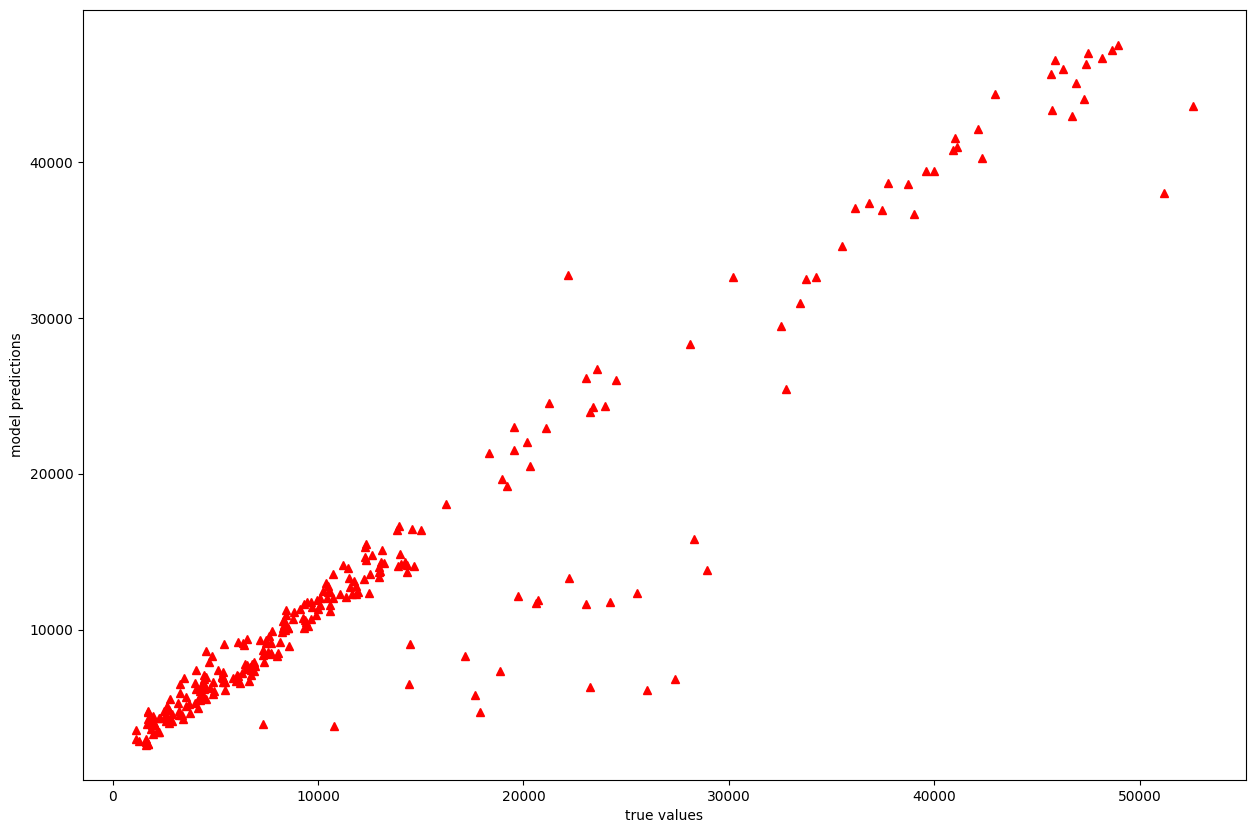

In [53]:
plt.figure(figsize=(15,10))
plt.plot(y_test, y_pred, '^', color='r')
plt.ylabel('model predictions')
plt.xlabel('true values')